# Cleaning and Preparing the Data

In [1]:
# Import dependencies 
# Add Matplotlib inline magic command
%matplotlib inline
# Setup
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# Import data
mouse_data = pd.read_csv('Mouse_metadata.csv')
study_data = pd.read_csv('Study_results.csv')


# Merge both sets of data into a single dataset 
merged_df = pd.merge(study_data, mouse_data, how="outer", on=["Mouse ID"])
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Display the number of unique mice IDs in the data
# Checking the number of mice.
total_mice = len(merged_df["Mouse ID"].unique())
print(f"Total mice: {total_mice}")

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.  
double_mice = merged_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)
index_df = merged_df.loc[double_mice, "Mouse ID"].unique()
print(f"Mice ID with Duplicate Timepoints: {index_df}") 


Total mice: 249
Mice ID with Duplicate Timepoints: ['g989']


In [4]:
# Prepping dataframe to be dropped

mice_ID_df = merged_df.loc[double_mice,'Mouse ID'].unique()
Mice_ID_df = merged_df.loc[merged_df['Mouse ID'] == mice_ID_df[0]]
Mice_ID_df             

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df.drop(Mice_ID_df.index)
print(f"Number of total enteries containing  mice ID's with unique Timepoint value: {len(clean_df)}")

clean_df
# Checking the number of mice in the clean DataFrame.
mice_analysis = len(clean_df["Mouse ID"].unique())
print(f"Number of mice with unique Timepoint values excluding duplicate mice: {mice_analysis}")

Number of total enteries containing  mice ID's with unique Timepoint value: 1880
Number of mice with unique Timepoint values excluding duplicate mice: 248


# Summary Statistics

In [6]:
# Create a summary statistic with A row for each drug regimen contained in the index column and corresponding column values with the following statistics: mean, median, variance, standard deviation, and SEM of the tumor volume.

drug_regimen = clean_df.groupby("Drug Regimen")
summary_statistic = drug_regimen["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_statistic

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar Charts and Pie Charts

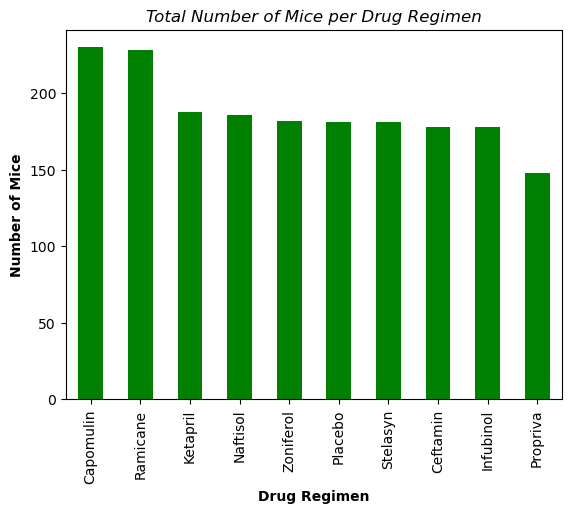

In [7]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
barplot_pandas = drug_regimen["Mouse ID"].count().sort_values(ascending=False)
plot_pd = barplot_pandas.plot(kind="bar", color="green", width=0.5)
plot_pd.set_title(label="Total Number of Mice per Drug Regimen", fontstyle = "italic")
plot_pd.set_xlabel("Drug Regimen", fontweight = "bold")
plot_pd.set_ylabel("Number of Mice", fontweight = "bold")
plt.savefig("barchart_pandas.png")
plt.show()

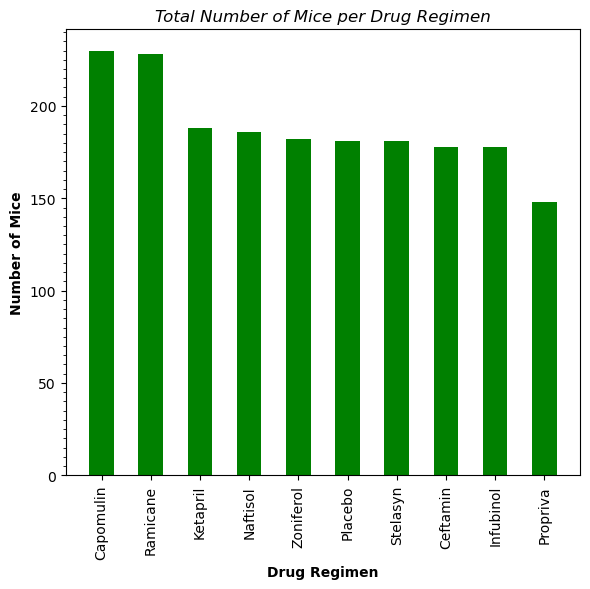

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# This method allows for tickers to be added
from matplotlib.ticker import MultipleLocator
fig, ax = plt.subplots(figsize=(6, 6))
x_axis_plot = np.arange(len(barplot_pandas))
drug_name = list(barplot_pandas.index.values)
plot_pyplot = plt.bar(x_axis_plot, barplot_pandas, color="green", alpha = 1.0, width = 0.5)
plt.xticks(x_axis_plot, drug_name, rotation="vertical")
plt.title("Total Number of Mice per Drug Regimen", fontstyle = "italic")
plt.xlabel("Drug Regimen", fontweight = "bold")
plt.ylabel("Number of Mice", fontweight = "bold")
ax.set_yticks(np.arange(0, 250, step=50))
ax.yaxis.set_minor_locator(MultipleLocator(5))
plt.tight_layout()
plt.savefig("barchart_pyplot.png")
plt.show()

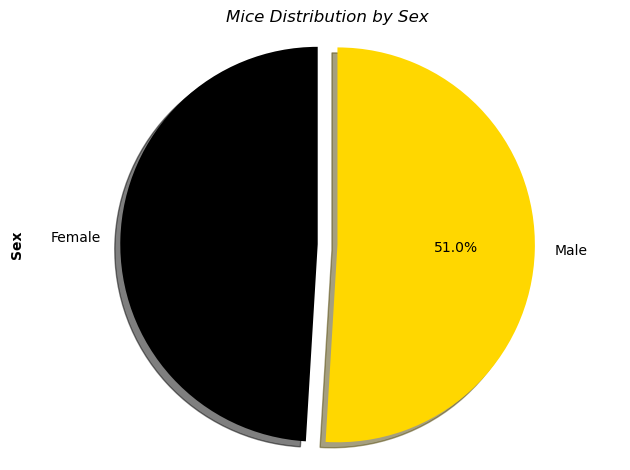

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_plot = clean_df.groupby("Sex")["Sex"].count()
colors = ['black', 'gold']
pie_sex_plot = sex_plot.plot(kind="pie", colors=colors, autopct='%1.1f%%', startangle=90, explode=[0, 0.1], shadow=True)
plt.axis("equal")
pie_sex_plot.set_title(label= "Mice Distribution by Sex", fontstyle = "italic")
pie_sex_plot.set_ylabel("Sex", fontweight = "bold")
plt.tight_layout()
pie_sex_plot.figure.savefig("Piecharts_pandas.png")
plt.show()

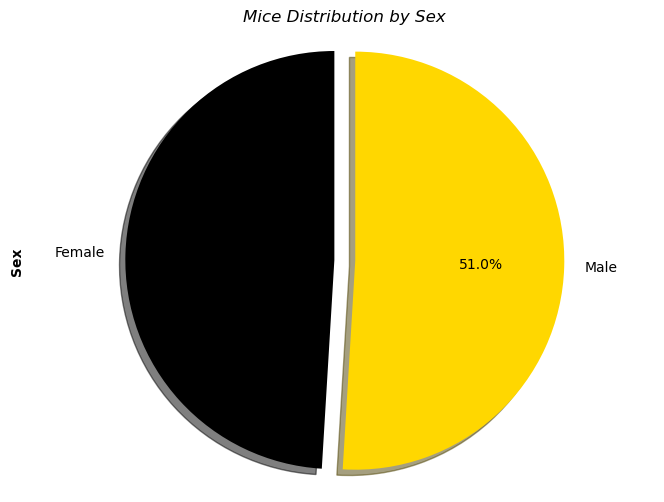

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_plot2 = sex_plot.index
plt.subplots(figsize=(8,6))
plt.pie(sex_plot, 
        labels = sex_plot2, 
        autopct = "%1.1f%%", 
        colors= ['black', 'gold'],
        startangle= 90, 
        shadow=True,
        explode=[0, 0.1]) 
plt.axis("equal")
plt.title("Mice Distribution by Sex", fontstyle = 'italic')
plt.ylabel("Sex", fontweight = "bold")
plt.savefig("Piecharts_pyplot.png")
plt.show()

# Quartiles, IQR, and Outliers

In [11]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:Capomulin, Ramicane, Infubinol, and Ceftamin

final_tumor_vol = clean_df.groupby(["Drug Regimen", "Mouse ID"]).last()[["Timepoint", "Tumor Volume (mm3)"]]
final_tumor_df = final_tumor_vol.reset_index()

In [12]:
# Create a list then add on treatment types
regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in regimen:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = final_tumor_df.loc[final_tumor_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset
    final_tumor_vol_list.append(final_tumor_vol)
    
    # Calculate the IQR and quantitatively
    quartiles = final_tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = final_tumor_vol.mean()
    iqr = upperq-lowerq    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Determine outliers using upper and lower bounds
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]

    # Print out the result
    print(f"{drug} Regimen")
    print(f"Final tumor volume(mm3) for {drug} above {round(upper_bound,2)} could be outliers.")
    print(f"Final tumor volume(mm3) for {drug} below {round(lower_bound,2)} could be outliers.")
    print(f"Average tumor volume(mm3) for {drug} is: {round(mean,2)}")
    print(f"Number of outliers for {drug} is: {outliers.count()}")
    if outliers.count() > 0:
        for i in outliers.index:
            print(f"Outlier final tumor volume(mm3) is {round(outliers[i], 2)}")
    print("-------------------------------------------------------------------")

Capomulin Regimen
Final tumor volume(mm3) for Capomulin above 51.83 could be outliers.
Final tumor volume(mm3) for Capomulin below 20.7 could be outliers.
Average tumor volume(mm3) for Capomulin is: 36.67
Number of outliers for Capomulin is: 0
-------------------------------------------------------------------
Ramicane Regimen
Final tumor volume(mm3) for Ramicane above 54.31 could be outliers.
Final tumor volume(mm3) for Ramicane below 17.91 could be outliers.
Average tumor volume(mm3) for Ramicane is: 36.19
Number of outliers for Ramicane is: 0
-------------------------------------------------------------------
Infubinol Regimen
Final tumor volume(mm3) for Infubinol above 82.74 could be outliers.
Final tumor volume(mm3) for Infubinol below 36.83 could be outliers.
Average tumor volume(mm3) for Infubinol is: 58.18
Number of outliers for Infubinol is: 1
Outlier final tumor volume(mm3) is 36.32
-------------------------------------------------------------------
Ceftamin Regimen
Final tum

# Boxplots

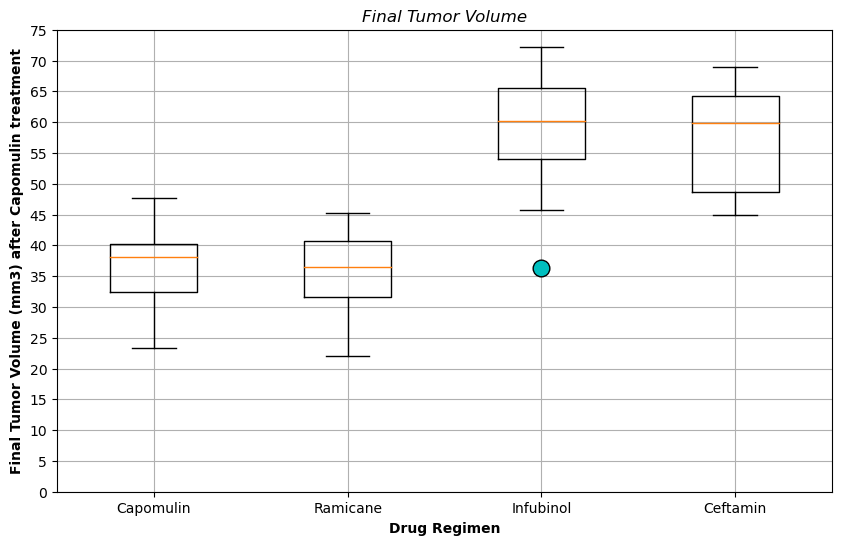

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(final_tumor_vol_list, labels=regimen, flierprops={"markerfacecolor":"c","markersize": 12})
ax.set_title("Final Tumor Volume", fontstyle="italic")
ax.set_xlabel("Drug Regimen", fontweight="bold")
ax.set_ylabel("Final Tumor Volume (mm3) after Capomulin treatment", fontweight="bold")
ax.set_yticks(np.arange(0, 80, step=5))
ax.grid()
ax.figure.savefig("Boxplot.png")
plt.show()

# Line Plot and a Scatter Plot

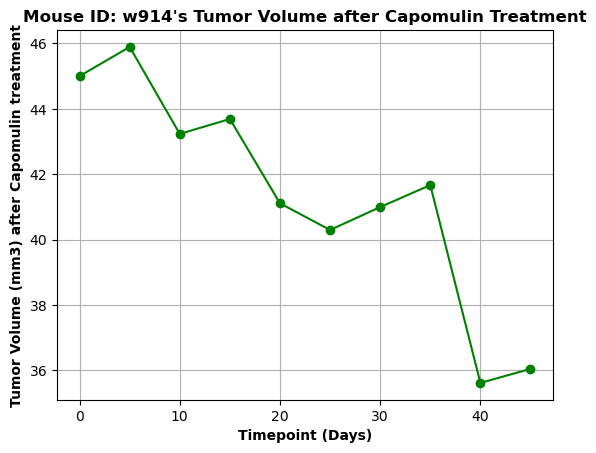

In [14]:
# Generate a line plot of tumor volume for a mouse treated with Capomulin
Capomulin_data= clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
mouse_id = "w914"
mouse_df = Capomulin_data.loc[Capomulin_data["Mouse ID"] == mouse_id]
time_vol = plt.plot(mouse_df["Timepoint"], mouse_df["Tumor Volume (mm3)"], marker="o", color="green")
plt.title(f"Mouse ID: {mouse_id}'s Tumor Volume after Capomulin Treatment", fontweight="bold")
plt.xlabel("Timepoint (Days)", fontweight="bold")
plt.ylabel("Tumor Volume (mm3) after Capomulin treatment", fontweight="bold")
plt.grid()
plt.savefig("Lineplot.png")
plt.show()

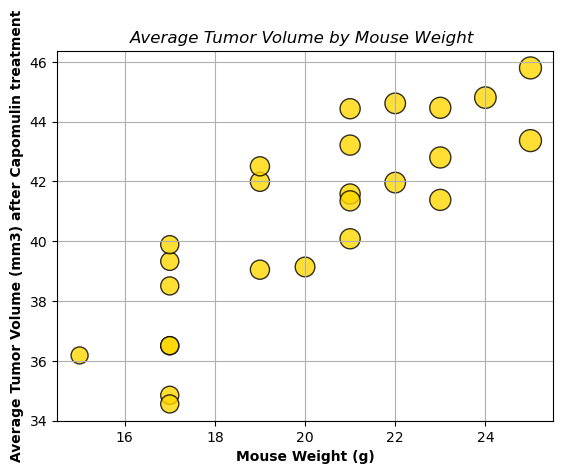

In [15]:
# Generate a scatter plot of average tumor volume by mouse weight under Capomulin regimen
Capomulin = Capomulin_data.groupby("Mouse ID").mean()
weight_avg = Capomulin["Weight (g)"]
tumor_avg = Capomulin["Tumor Volume (mm3)"]

plt.scatter(weight_avg, tumor_avg, s=10*weight_avg, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Capomulin")
plt.title("Average Tumor Volume by Mouse Weight ", fontstyle="italic")
plt.xlabel("Mouse Weight (g)", fontweight="bold")
plt.ylabel("Average Tumor Volume (mm3) after Capomulin treatment", fontweight="bold")
plt.grid()
plt.savefig("Scatterplot.png")
plt.show()

# Correlation and Regression

The correlation between mouse weight and average tumor volume is: 0.84
The r-squared of linear regression is: 0.71


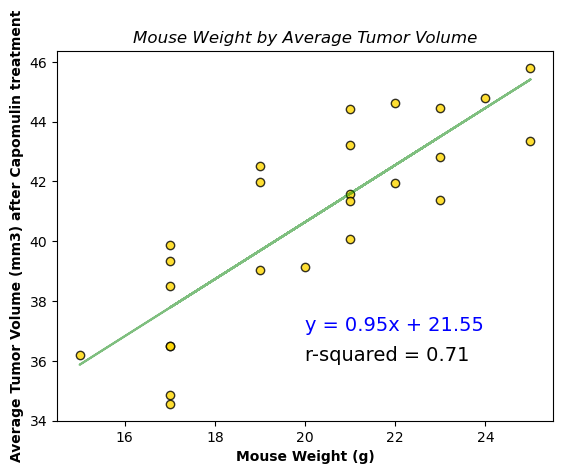

In [16]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume under Capomulin regimen
x_values = weight_avg
y_values = tumor_avg
correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f"The correlation between mouse weight and average tumor volume is: {correlation}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
r_squared = round(rvalue**2,2)
print(f"The r-squared of linear regression is: {r_squared}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Capomulin")
plt.plot(x_values,regress_values, color="g", alpha=0.5)
plt.annotate(line_eq,(20,37), fontsize=14, color="blue")
plt.annotate(f"r-squared = {r_squared}", (20,36), fontsize=14, color="black")
plt.title("Mouse Weight by Average Tumor Volume", fontstyle="italic")
plt.xlabel("Mouse Weight (g)", fontweight="bold")
plt.ylabel("Average Tumor Volume (mm3) after Capomulin treatment", fontweight="bold")
plt.savefig('Scatterplot_withregression.png')
plt.show()